In [44]:
import numpy as np
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
import copy
#import pylab as pyl
from pprint import pprint
%matplotlib inline

In [45]:
# only need the Z, RA, DEC from each line
# and of these, only the ones that fall into the HSC's observed patches

In [46]:
quasarcat = open("quasarcatLowZSource.txt", "rw+")
print "Name of file: ", quasarcat.name
for i in range(135):
    line = quasarcat.readline()

print line
# the last line that doesn't have data


line = quasarcat.readline()

print line
print line.split()[3]


Name of file:  quasarcatLowZSource.txt
--------------------------------------------------------------------------------

000006.53+003055.2   0.027228   0.515341 1.8246 20.384 0.065 20.461 0.034 20.324 0.038 20.093 0.041 20.042 0.121  0.130 20.508  0.000   0.000  0.000  -9.000  0.000  0.000  0.000 0.000  0.000 0.000  0.000 0.000  0.000  0 -25.109  0.091  0  0  1  0    34603008  0  0  0  0  1  0  0  3325 52522 52203  685  467  41  5  108  118    34603008  0  0  0  0  1  0  0 20.384 0.065 20.461 0.034 20.324 0.038 20.093 0.041 20.042 0.121   588015509806252150   193034571183292416 SDSS J000006.53+003055.2 

1.8246


In [47]:
# range for HSC data:
# RA: 30 < a < 40    DEC: -7 < d < -2
# RA: 330 < a < 345  DEC: -1 < d < 3
# RA: 213 < a < 223  DEC: -2 < d < 2
# RA: 175 < a < 184  DEC: -2 < d < 2
# RA: 128 < a < 142  DEC: -1 < d < 5
# RA: 242 < a < 247  DEC: 42 < d < 45

In [48]:
# this has to run while the file is still open- if you run this cell alone it won't work
# also make sure it's starting on the line you want to start on
# length of file is 105,783 quasars


NAME = []
RA = []
DEC = []
Z = []
counter = 0

for line in quasarcat:
    counter = counter + 1
    NAME.append(line.split()[0])
    RA.append(line.split()[1])
    DEC.append(line.split()[2])
    Z.append(line.split()[3])
    

# quasar phone number, RA, DEC, Z
print counter


105782


In [49]:
print NAME[0]
print RA[0]
print DEC[0]
print Z[0]

print

RA = [float(i) for i in RA]
DEC = [float(j) for j in DEC]
Z = [float(k) for k in Z]


000008.13+001634.6
0.033900
0.276301
1.8373



In [50]:
# now find the ones that are in the correct range

for i in range(len(RA)):
    if RA[i] >= 30 and RA[i] <= 40 and DEC[i] >= -7 and DEC[i] <= -2:
        continue
    elif RA[i] >= 330 and RA[i] <=345 and DEC[i] >= -1 and DEC[i] <= 3:
        continue
    elif RA[i] >= 213 and RA[i] <= 223 and DEC[i] >= -2 and DEC[i] <= 2:
        continue
    elif RA[i] >= 175 and RA[i] <= 184 and DEC[i] >= -2 and DEC[i] <= 2:
        continue
    elif RA[i] >= 128 and RA[i] <= 142 and DEC[i] >= -1 and DEC[i] <= 5:
        continue
    elif RA[i] >= 242 and RA[i] <= 247 and DEC[i] >= 42 and DEC[i] <= 45:
        continue
    else:
        RA[i] = float(np.nan)
        DEC[i] = float(np.nan)
        Z[i] = float(np.nan)


print len(DEC)
print len(RA)
print len(Z)


105782
105782
105782


In [51]:
RA = np.asarray(RA)
RA = RA[~np.isnan(RA)]

DEC = np.asarray(DEC)
DEC = DEC[~np.isnan(DEC)]

Z = np.asarray(Z)
Z = Z[~np.isnan(Z)]

# from 105,782 quasars to 3,101
print len(RA)
print len(DEC)
print len(Z)

3101
3101
3101


In [52]:
# range for HSC data:
# RA: 30 < a < 40    DEC: -7 < d < -2
# RA: 330 < a < 345  DEC: -1 < d < 3
# RA: 213 < a < 223  DEC: -2 < d < 2
# RA: 175 < a < 184  DEC: -2 < d < 2
# RA: 128 < a < 142  DEC: -1 < d < 5
# RA: 242 < a < 247  DEC: 42 < d < 45

In [53]:
RA = np.asarray(RA)
DEC = np.asarray(DEC)

print len(RA)

3101


In [54]:
print RA[0], DEC[0], Z[0]

128.062795 4.874437 1.4659


In [55]:
col1 = fits.Column(name='RA', format='D', array=RA)
col2 = fits.Column(name='DEC', format='D', array=DEC)
col3 = fits.Column(name='Z', format='D', array=Z)

In [56]:
cols = fits.ColDefs([col1, col2, col3])

In [57]:
table = fits.BinTableHDU.from_columns(cols)

In [58]:
#table.writeto('SDSS_lowZ_quasar.fits')  --  already written

In [59]:
data = fits.open('SDSS_lowZ_quasar.fits')

In [60]:
print data[1].columns

ColDefs(
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'Z'; format = 'D'
)


In [61]:
quasars = data[1].data 

In [62]:
testZ = quasars['Z']
testRA = copy.copy(quasars['RA'])
testDEC = copy.copy(quasars['DEC'])

In [63]:
print len(testZ)

3101


In [64]:
print testZ[0]

1.4659


In [65]:
print testRA[0], testDEC[0]

128.062795 4.874437


In [66]:
#print len(quasars['id'])
#print quasars['id']
#qnames = np.asarray(quasars['id'])
#qnames = qnames[~np.isnan(qnames)]
#print len(qnames)

# first 1000 returned 1785 objects
# second 1000 returned 2471 objects
# third 1000 returned 2774 objects

In [67]:
def galaxy_mag(Mc, Mp):
    # 0 magnitude meaningless in this case. ignore them
    if Mc == 0 or Mp == 0:
        return float(np.nan)
    # where Mc is the complete model magnitude and  Mp is the quasar PSF magnitude
    return -2.5*np.log10((10**(-Mc/2.5)) - 10**(-Mp/2.5))



In [68]:
# 7030 matches found for 3101 quasars
# using TOPCAT, 2718 matches to the 3101 quasars

In [69]:
matches = fits.open('QuasarMatchComplete.fits')
print matches[1].columns
qdata = matches[1].data

ColDefs(
    name = 'id'; format = 'K'
    name = 'id_isnull'; format = 'L'
    name = 'ra2000'; format = 'D'
    name = 'ra2000_isnull'; format = 'L'
    name = 'decl2000'; format = 'D'
    name = 'decl2000_isnull'; format = 'L'
    name = 'gmag_psf'; format = 'D'
    name = 'gmag_psf_isnull'; format = 'L'
    name = 'rmag_psf'; format = 'D'
    name = 'rmag_psf_isnull'; format = 'L'
    name = 'imag_psf'; format = 'D'
    name = 'imag_psf_isnull'; format = 'L'
    name = 'zmag_psf'; format = 'D'
    name = 'zmag_psf_isnull'; format = 'L'
    name = 'ymag_psf'; format = 'D'
    name = 'ymag_psf_isnull'; format = 'L'
    name = 'gmag_psf_err'; format = 'D'
    name = 'gmag_psf_err_isnull'; format = 'L'
    name = 'rmag_psf_err'; format = 'D'
    name = 'rmag_psf_err_isnull'; format = 'L'
    name = 'imag_psf_err'; format = 'D'
    name = 'imag_psf_err_isnull'; format = 'L'
    name = 'zmag_psf_err'; format = 'D'
    name = 'zmag_psf_err_isnull'; format = 'L'
    name = 'ymag_psf_err'; 

In [70]:
rmagP = copy.copy(qdata['rmag_psf'])
rmagC = copy.copy(qdata['rmag_cmodel'])
gmagP = copy.copy(qdata['gmag_psf'])
gmagC = copy.copy(qdata['gmag_cmodel'])
imagP = copy.copy(qdata['imag_psf'])
imagC = copy.copy(qdata['imag_cmodel'])
zmagP = copy.copy(qdata['zmag_psf'])
zmagC = copy.copy(qdata['zmag_cmodel'])
ymagP = copy.copy(qdata['ymag_psf'])
ymagC = copy.copy(qdata['ymag_cmodel'])
Z = copy.copy(qdata['Z'])



galaxy_magR = np.zeros(len(qdata['rmag_psf']))
galaxy_magG = np.zeros(len(qdata['gmag_psf']))
galaxy_magI = np.zeros(len(qdata['imag_psf']))
galaxy_magZ = np.zeros(len(qdata['zmag_psf']))
galaxy_magY = np.zeros(len(qdata['ymag_psf']))



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


1086
2718


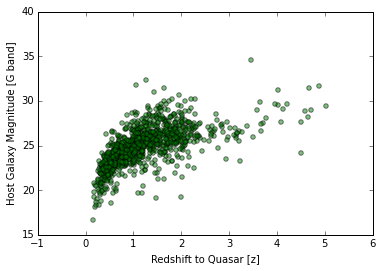

In [71]:
i = 0
galmag = 0
for i in range(len(gmagP)):
    galmag = galaxy_mag(gmagC[i], gmagP[i])
    galaxy_magG[i] = galmag
    
#print galaxy_magG

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Z, galaxy_magG, alpha = .5, c = 'green')
ax.set_xlabel('Redshift to Quasar [z]')
ax.set_ylabel('Host Galaxy Magnitude [G band]')

fig.show()

print len(galaxy_magG[~np.isnan(galaxy_magG)])
print len(Z[~np.isnan(Z)])  

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


19.0339060514
19.032950555
1.278
nan
1199


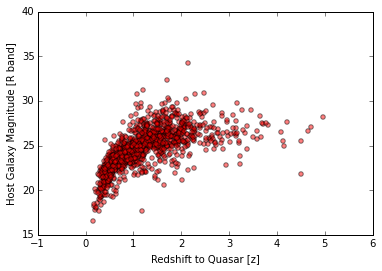

In [72]:
i = 0
galmag = 0
for i in range(len(rmagP)):
    galmag = galaxy_mag(rmagC[i], rmagP[i])
    galaxy_magR[i] = galmag
    
#print galaxy_magR


print rmagC[0]
print rmagP[0]
print Z[0]

print galaxy_mag(rmagC[0], rmagP[0])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Z, galaxy_magR, alpha = .5, c = 'red')
ax.set_xlabel('Redshift to Quasar [z]')
ax.set_ylabel('Host Galaxy Magnitude [R band]')

fig.show()


print len(galaxy_magR[~np.isnan(galaxy_magR)]) 


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


1465


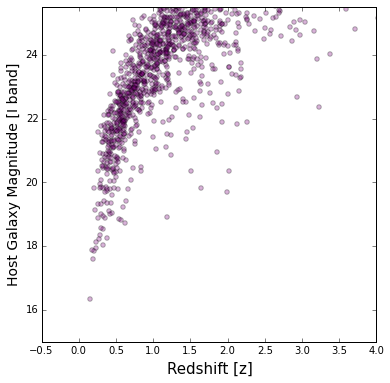

In [73]:
i = 0
galmag = 0
for i in range(len(imagP)):
    galmag = galaxy_mag(imagC[i], imagP[i])
    galaxy_magI[i] = galmag
    


fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(6)
ax = fig.add_subplot(111)
ax.scatter(Z, galaxy_magI, alpha = .3, c = 'purple')
ax.set_xlabel('Redshift to Quasar [z]')
plt.xlabel('Redshift [z]', fontsize=15)

ax.set_ylabel('Host Galaxy Magnitude [I band]')
plt.ylabel('Host Galaxy Magnitude [I band]', fontsize=14)
#ax.set_xlim([-.5,6])
#ax.set_ylim([15,25])
ax.set_xlim(xmax = 4, xmin = -.5)
ax.set_ylim(ymin = 15, ymax = 25.5)



print len(galaxy_magI[~np.isnan(galaxy_magI)])  


fig.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


1292


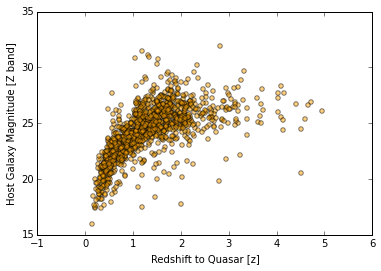

In [74]:
i = 0
galmag = 0
for i in range(len(zmagP)):
    galmag = galaxy_mag(zmagC[i], zmagP[i])
    galaxy_magZ[i] = galmag
    


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Z, galaxy_magZ, alpha = .5, c = 'orange')
ax.set_xlabel('Redshift to Quasar [z]')
ax.set_ylabel('Host Galaxy Magnitude [Z band]')

print len(galaxy_magZ[~np.isnan(galaxy_magZ)])  # 


fig.show()

1170


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


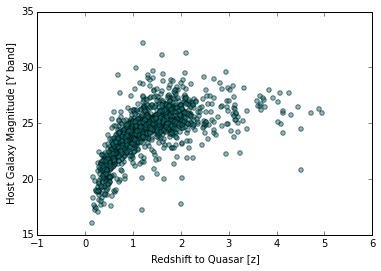

In [75]:
i = 0
galmag = 0
for i in range(len(ymagP)):
    galmag = galaxy_mag(ymagC[i], ymagP[i])
    galaxy_magY[i] = galmag
    
#print galaxy_magY


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Z, galaxy_magY, alpha = .5, c = 'teal')
ax.set_xlabel('Redshift to Quasar [z]')
ax.set_ylabel('Host Galaxy Magnitude [Y band]')

print len(galaxy_magY[~np.isnan(galaxy_magY)])  


fig.show()


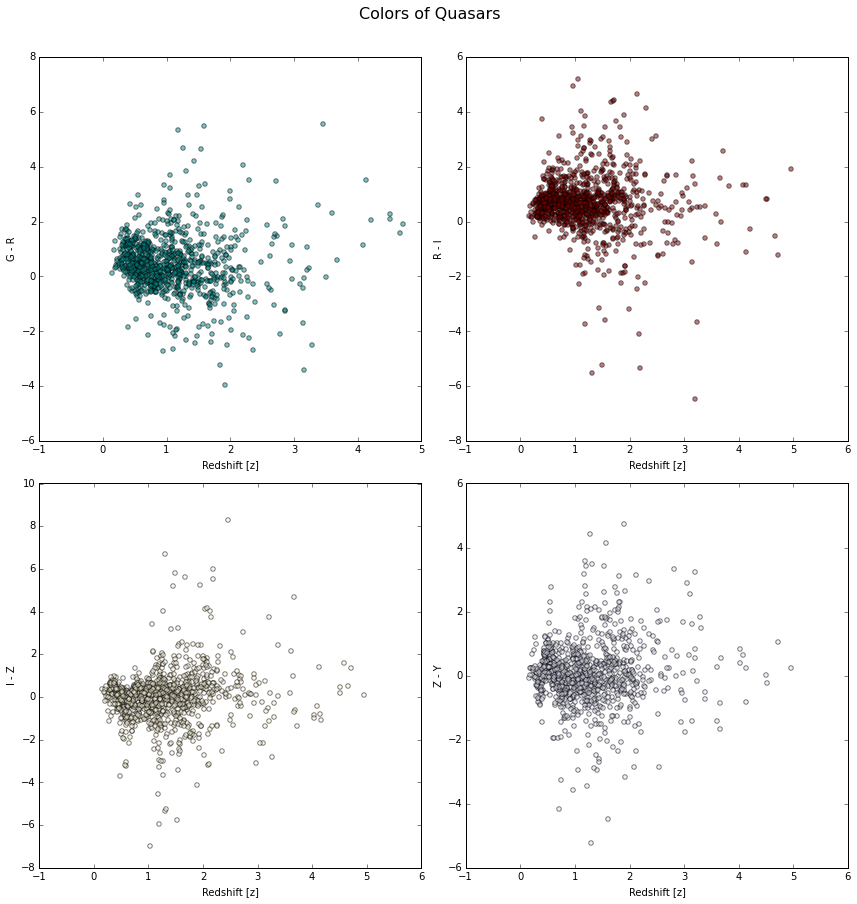

In [76]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)
fig.suptitle("Colors of Quasars", fontsize = 16, y = 1.04)

galaxy_magGR = np.zeros(len(galaxy_magG))
galaxy_magRI = np.zeros(len(galaxy_magR))
galaxy_magIZ = np.zeros(len(galaxy_magI))
galaxy_magZY = np.zeros(len(galaxy_magZ))






for i in range(len(galaxy_magG)):
    if galaxy_magG[i] > 25 or galaxy_magR[i] > 25:
        galaxy_magGR[i] = float('nan')
    galaxy_magGR[i] = galaxy_magG[i] - galaxy_magR[i]
    
    #####
    
for i in range(len(galaxy_magRI)):
    if galaxy_magR[i] > 25 or galaxy_magI[i] > 25:
        galaxy_magRI[i] = float('nan')
    galaxy_magRI[i] = galaxy_magR[i] - galaxy_magI[i]
    
    ######
    
for i in range(len(galaxy_magIZ)):
    if galaxy_magI[i] > 25 or galaxy_magZ[i] > 25:
        galaxy_magIZ[i] = float('nan')
    galaxy_magIZ[i] = galaxy_magI[i] - galaxy_magZ[i]
    
    ######

for i in range(len(galaxy_magZY)):
    if galaxy_magZ[i] > 25 or galaxy_magY[i] > 25:
        galaxy_magZY[i] = float('nan')
    galaxy_magZY[i] = galaxy_magZ[i] - galaxy_magY[i]
    
    #######

ax1 = plt.subplot(221, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'G - R') #xlim=[-10,10], ylim=[-10,10])
plt.scatter(Z, galaxy_magGR, c = 'darkcyan', alpha = .5)

ax2 = plt.subplot(222, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'R - I')
plt.scatter(Z, galaxy_magRI, c = 'maroon', alpha = .5)

ax3 = plt.subplot(223, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'I - Z')
plt.scatter(Z, galaxy_magIZ, c = 'cornsilk', alpha = .5)

ax2 = plt.subplot(224, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'Z - Y')
plt.scatter(Z, galaxy_magZY, c = 'lavender', alpha = .5)

fig.tight_layout()
plt.draw()
plt.show()



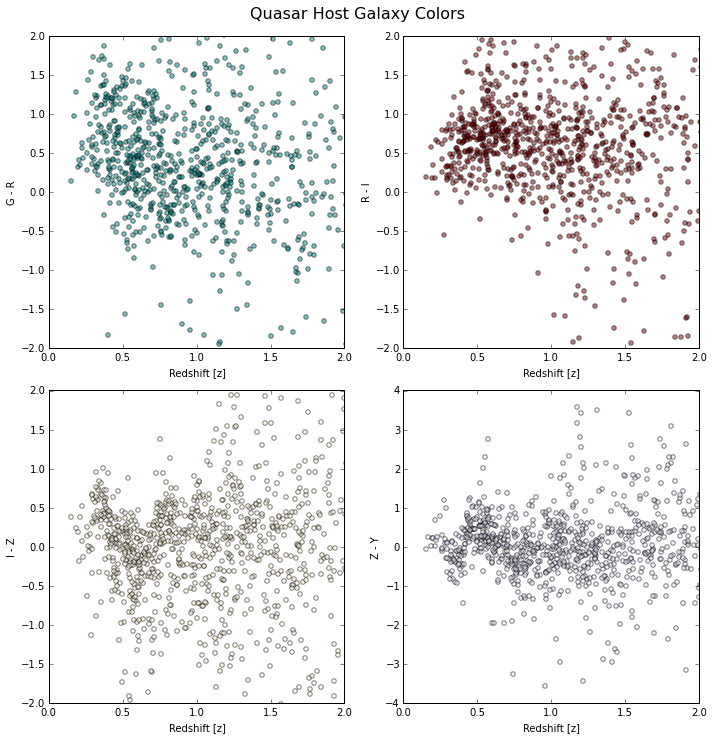

In [87]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle("Quasar Host Galaxy Colors", fontsize = 16, y = 1.02)
zeroy = [0, .2, .4, .6, .8, 1, 1.2, 1.4, 1.6, 1.8, 2]
zero = np.zeros(len(zeroy))

ax1 = plt.subplot(221, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'G - R', xlim =[-10, 10], ylim=[-10,10])
plt.scatter(Z, galaxy_magGR, c = 'darkcyan', alpha = .5)
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .7, linewidth=2)


ax1.set_ylim([-2, 2])
ax1.set_xlim([0,2])

ax2 = plt.subplot(222, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'R - I', xlim=[-10,10], ylim=[-10,10])
plt.scatter(Z, galaxy_magRI, c = 'maroon', alpha = .5)
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .7, linewidth=2)

ax2.set_ylim([-2, 2])
ax2.set_xlim([0,2])

ax3 = plt.subplot(223, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'I - Z', xlim=[-10,10], ylim=[-10,10])
plt.scatter(Z, galaxy_magIZ, c = 'cornsilk', alpha = .5)
#plt.plot(zeroy, zero, '--', color = 'gray', alpha = .7, linewidth=2)


ax3.set_ylim([-2, 2])
ax3.set_xlim([0,2])

ax4 = plt.subplot(224, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'Z - Y', xlim=[-10,10], ylim=[-10,10])
plt.scatter(Z, galaxy_magZY, c = 'lavender', alpha = .5)
#plt.plot(zeroy, zero, '--', color = 'gray', alpha = .7, linewidth=2)


ax4.set_ylim([-4, 4])
ax4.set_xlim([0,2])


fig.tight_layout()
plt.savefig("QHColors10Zoom.png")

plt.draw()
plt.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide


(0, 1.5)

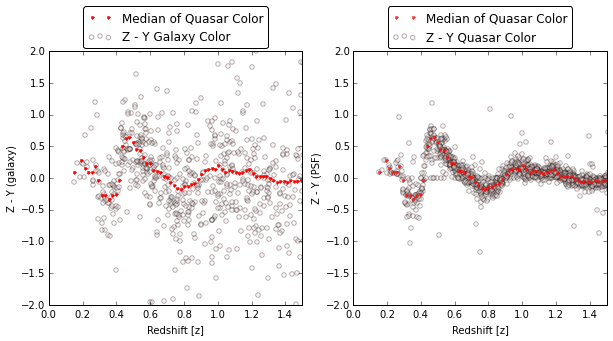

In [78]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)




x = Z
y = zmagP - ymagP

x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
nbins = 200

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
mean = sy / n


total_bins = 75


ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = 'Z - Y (PSF)')
plt.scatter(Z, zmagP - ymagP, c = 'mistyrose', alpha = .3, label = 'Z - Y Quasar Color')
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(Z,bins)
running_medianZY = [np.median((zmagP - ymagP)[idx==k]) for k in range(total_bins)]
plt.plot(bins-delta/2,running_medianZY,'r.',lw=5,alpha=.8, label = 'Median of Quasar Color')
#plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'Z - Y (galaxy)')
plt.scatter(Z, galaxy_magZ - galaxy_magY, c = 'mistyrose', alpha = .3, label = 'Z - Y Galaxy Color')

plt.plot(bins-delta/2,running_medianZY,'r.',lw=5,alpha=1.0, label = 'Median of Quasar Color')
#plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in divide


(0, 1.5)

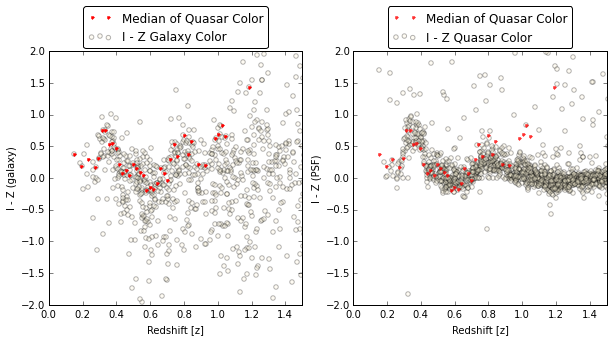

In [79]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)






x = Z
y = galaxy_magI - galaxy_magZ

x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
nbins = 200

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
mean = sy / n






ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = 'I - Z (PSF)')
plt.scatter(Z, imagP - zmagP, c = 'cornsilk', alpha = .3, label = 'I - Z Quasar Color')
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])





bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(Z,bins)
running_medianIZ = [np.median((galaxy_magI - galaxy_magZ)[idx==k]) for k in range(total_bins)]
plt.plot(bins-delta/2,running_medianIZ,'r.',lw=5,alpha=.8, label = 'Median of Quasar Color')
#plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'I - Z (galaxy)')
plt.scatter(Z, galaxy_magI - galaxy_magZ, c = 'cornsilk', alpha = .3, label = 'I - Z Galaxy Color')

plt.plot(bins-delta/2,running_medianIZ,'r.',lw=5,alpha=1.0, label = 'Median of Quasar Color')
#plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])